## Simulating data for simcat


This notebook demonstrates the use `simcat.Model` which is the core object used to sample msprime parameters and given a set of arguments and return a tree_sequence object to generate mutations on. 

### Required software

In [1]:
import simcat   
import toytree
import numpy as np
import itertools as itt

### The simulation tree
We plan to develop simcat so that the user can enter an unscaled tree topology and simcat will infer correct branch lengths in coalescent units (2N). This problem would be much simpler, however, if the user entered a tree with reasonable branch length estimates to start so that we only had to test modifications of these. For now, we'll assume that is the case, that the user has entered a tree with edge lengths in coalescent units. When edges are separated by more time there are many more mutations between them, and thus the simulations run much faster. 

In [3]:
## generate a species tree
tree = toytree.rtree.coaltree(ntips=8, seed=12345)
tree = tree.mod.node_scale_root_height(3)
c, a = tree.draw(tree_style='c')

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t6ea0f638b1a44f00bbea05552472c9b4" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 275.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> idx: 0
name: r5
dist: 0.0061
support: 100
height: 0.0000 0 idx: 1
name: r6
dist: 0.0061
support: 100
height: 0.0000 1 idx: 2
name: r2
dist: 1.1530
support: 100
height: 0.0000 2 idx: 3
name: r3
dist: 1.2318
support: 100
height: 0.0000 3 idx: 4
name: r7
dist: 1.7220
support: 100
height: 0.0000 4 idx: 5
name: r4
dist: 0.4956
support: 100
height: 0.0000 5 idx: 6
name: r1
dist: 0.4956
support: 100
height: 0.0000 6 idx: 7
name: r0
dist: 0.7558
support: 100
height: 0.0000 7 idx: 8
name: 8
dist: 1.1470
support: 100
height: 0.0061 8 idx: 9
name: 9
dist: 0.0788
support: 100
height: 1.1530 9 idx: 10
name: 10
dist: 0.4902
support: 100
height: 1.2318 10 idx: 11
name: 11
dist: 0.2602
support: 100
height: 0.4956 11 idx: 12
name: 12
dist: 1.2780
support: 100
height: 1.7220 12 idx: 13
name: 13
dist: 2.2442
support: 100
height: 0.7558 13 idx: 14
name: 14
dist: 0.0000
support: 100
height: 3.0000 14 0.00 1.50 3.00

In [4]:
# method the defines the order of quartet samples
n = 5
qiter = itt.combinations(range(n), 4)
for currquart in qiter:
    print(currquart)

(0, 1, 2, 3)
(0, 1, 2, 4)
(0, 1, 3, 4)
(0, 2, 3, 4)
(1, 2, 3, 4)


### An example simulation scenario

In [17]:
## get observed data w/o migration
observed = simcat.Model(
    tree=tree, 
    admixture_edges = (
        (13, 12, 0.5, 0.5, None),
    ),
    theta=(2.0, 0.02),
    nsnps=10000,
    ntests=1,
    nreps=1,
    #debug=True,
    )

In [18]:
observed.run()

In [11]:
observed.plot_test_values();

<svg class="toyplot-canvas-Canvas" height="250.0px" id="te1a7535f01024ef8bd57245cf0f97d63" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 800.0 250.0" width="800.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 0.0 0.1 0.2 0.3 0.4 0.5 simulation index 0 1 2 3 migration intervals -0.3 0.0 0.3 0.6 proportion migrants 0.0 0.5 1.0 frequency

In [12]:
simcat.plot.draw_count_matrix(observed.counts[0][43], width=700, height=700);

<svg class="toyplot-canvas-Canvas" height="700.0px" id="tbbf3ad59e6cf450cae158dc71e0e78f8" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 700.0 700.0" width="700.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 0.000000 AAAA 0.444976 AAAC 0.449761 AAAG 0.377990 AAAT 0.330144 AACA 0.894737 AACC 0.000000 AACG 0.000000 AACT 0.425837 AAGA 0.000000 AAGC 0.775120 AAGG 0.000000 AAGT 0.306220 AATA 0.000000 AATC 0.000000 AATG 0.942584 AATT 1 0.502392 ACAA 0.000000 ACAC 0.000000 ACAG 0.000000 ACAT 0.009569 ACCA 0.488038 ACCC 0.000000 ACCG 0.000000 ACCT 0.000000 ACGA 0.000000 ACGC 0.000000 ACGG 0.000000 ACGT 0.000000 ACTA 0.000000 ACTC 0.000000 ACTG 0.000000 ACTT 2 0.416268 AGAA 0.000000 AGAC 0.000000 AGAG 0.000000 AGAT 0.000000 AGCA 0.000000 AGCC 0.000000 AGCG 0.000000 AGCT 0.009569 AGGA 0.000000 AGGC 0.440191 AGGG 0.000000 AGGT 0.000000 AGTA 0.000000 AGTC 0.000000 AGTG 0.000000 AGTT 3 0.516746 ATAA 0.000000 ATAC 0.000000 ATAG 0.000000 ATAT 0.000000 ATCA 0.000000 ATCC 0.000000 ATCG 0.000000 ATCT 0.000000 ATGA 0.000000 ATGC 0.000000 ATGG 0.000000 ATGT 0.000000 ATTA 0.000000 ATTC 0.000000 ATTG 0.440191 ATTT 4 0.454545 CAAA 0.000000 CAAC 0.000000 CAAG 0.000000 CAAT 0.000000 CACA 0.531101 CACC 0.000000 CACG 0.000000 CACT 0.000000 CAGA 0.000000 CAGC 0.000000 CAGG 0.000000 CAGT 0.000000 CATA 0.000000 CATC 0.000000 CATG 0.000000 CATT 5 0.885167 CCAA 0.392345 CCAC 0.000000 CCAG 0.000000 CCAT 0.377990 CCCA 0.000000 CCCC 0.325359 CCCG 0.406699 CCCT 0.000000 CCGA 0.354067 CCGC 0.866029 CCGG 0.000000 CCGT 0.000000 CCTA 0.440191 CCTC 0.000000 CCTG 0.913876 CCTT 6 0.000000 CGAA 0.000000 CGAC 0.000000 CGAG 0.000000 CGAT 0.000000 CGCA 0.531101 CGCC 0.000000 CGCG 0.000000 CGCT 0.000000 CGGA 0.000000 CGGC 0.531101 CGGG 0.000000 CGGT 0.000000 CGTA 0.000000 CGTC 0.000000 CGTG 0.000000 CGTT 7 0.000000 CTAA 0.000000 CTAC 0.000000 CTAG 0.000000 CTAT 0.000000 CTCA 0.531101 CTCC 0.000000 CTCG 0.000000 CTCT 0.000000 CTGA 0.000000 CTGC 0.000000 CTGG 0.000000 CTGT 0.000000 CTTA 0.000000 CTTC 0.000000 CTTG 0.440191 CTTT 8 0.406699 GAAA 0.000000 GAAC 0.004785 GAAG 0.000000 GAAT 0.000000 GACA 0.000000 GACC 0.000000 GACG 0.000000 GACT 0.000000 GAGA 0.000000 GAGC 0.502392 GAGG 0.000000 GAGT 0.000000 GATA 0.000000 GATC 0.000000 GATG 0.000000 GATT 9 0.000000 GCAA 0.000000 GCAC 0.000000 GCAG 0.000000 GCAT 0.000000 GCCA 0.440191 GCCC 0.000000 GCCG 0.000000 GCCT 0.000000 GCGA 0.000000 GCGC 0.416268 GCGG 0.000000 GCGT 0.000000 GCTA 0.000000 GCTC 0.000000 GCTG 0.000000 GCTT 10 0.976077 GGAA 0.000000 GGAC 0.368421 GGAG 0.000000 GGAT 0.000000 GGCA 1.000000 GGCC 0.311005 GGCG 0.000000 GGCT 0.435407 GGGA 0.296651 GGGC 0.000000 GGGG 0.325359 GGGT 0.000000 GGTA 0.000000 GGTC 0.330144 GGTG 0.851675 GGTT 11 0.000000 GTAA 0.000000 GTAC 0.000000 GTAG 0.000000 GTAT 0.000000 GTCA 0.000000 GTCC 0.000000 GTCG 0.000000 GTCT 0.000000 GTGA 0.000000 GTGC 0.521531 GTGG 0.004785 GTGT 0.000000 GTTA 0.000000 GTTC 0.000000 GTTG 0.416268 GTTT 12 0.492823 TAAA 0.000000 TAAC 0.000000 TAAG 0.004785 TAAT 0.000000 TACA 0.000000 TACC 0.000000 TACG 0.000000 TACT 0.000000 TAGA 0.000000 TAGC 0.000000 TAGG 0.000000 TAGT 0.000000 TATA 0.000000 TATC 0.000000 TATG 0.440191 TATT 13 0.000000 TCAA 0.000000 TCAC 0.000000 TCAG 0.000000 TCAT 0.000000 TCCA 0.492823 TCCC 0.000000 TCCG 0.000000 TCCT 0.000000 TCGA 0.000000 TCGC 0.000000 TCGG 0.000000 TCGT 0.000000 TCTA 0.000000 TCTC 0.000000 TCTG 0.392345 TCTT 14 0.000000 TGAA 0.000000 TGAC 0.000000 TGAG 0.000000 TGAT 0.000000 TGCA 0.000000 TGCC 0.000000 TGCG 0.000000 TGCT 0.000000 TGGA 0.000000 TGGC 0.440191 TGGG 0.000000 TGGT 0.000000 TGTA 0.000000 TGTC 0.000000 TGTG 0.473684 TGTT 15 0.784689 TTAA 0.0

In [13]:
simcat.plot.draw_count_matrix(observed.counts[0][43], width=700, height=700);

<svg class="toyplot-canvas-Canvas" height="700.0px" id="t6c66528d1d584882beea7495fe869aef" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 700.0 700.0" width="700.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 0.000000 AAAA 0.444976 AAAC 0.449761 AAAG 0.377990 AAAT 0.330144 AACA 0.894737 AACC 0.000000 AACG 0.000000 AACT 0.425837 AAGA 0.000000 AAGC 0.775120 AAGG 0.000000 AAGT 0.306220 AATA 0.000000 AATC 0.000000 AATG 0.942584 AATT 1 0.502392 ACAA 0.000000 ACAC 0.000000 ACAG 0.000000 ACAT 0.009569 ACCA 0.488038 ACCC 0.000000 ACCG 0.000000 ACCT 0.000000 ACGA 0.000000 ACGC 0.000000 ACGG 0.000000 ACGT 0.000000 ACTA 0.000000 ACTC 0.000000 ACTG 0.000000 ACTT 2 0.416268 AGAA 0.000000 AGAC 0.000000 AGAG 0.000000 AGAT 0.000000 AGCA 0.000000 AGCC 0.000000 AGCG 0.000000 AGCT 0.009569 AGGA 0.000000 AGGC 0.440191 AGGG 0.000000 AGGT 0.000000 AGTA 0.000000 AGTC 0.000000 AGTG 0.000000 AGTT 3 0.516746 ATAA 0.000000 ATAC 0.000000 ATAG 0.000000 ATAT 0.000000 ATCA 0.000000 ATCC 0.000000 ATCG 0.000000 ATCT 0.000000 ATGA 0.000000 ATGC 0.000000 ATGG 0.000000 ATGT 0.000000 ATTA 0.000000 ATTC 0.000000 ATTG 0.440191 ATTT 4 0.454545 CAAA 0.000000 CAAC 0.000000 CAAG 0.000000 CAAT 0.000000 CACA 0.531101 CACC 0.000000 CACG 0.000000 CACT 0.000000 CAGA 0.000000 CAGC 0.000000 CAGG 0.000000 CAGT 0.000000 CATA 0.000000 CATC 0.000000 CATG 0.000000 CATT 5 0.885167 CCAA 0.392345 CCAC 0.000000 CCAG 0.000000 CCAT 0.377990 CCCA 0.000000 CCCC 0.325359 CCCG 0.406699 CCCT 0.000000 CCGA 0.354067 CCGC 0.866029 CCGG 0.000000 CCGT 0.000000 CCTA 0.440191 CCTC 0.000000 CCTG 0.913876 CCTT 6 0.000000 CGAA 0.000000 CGAC 0.000000 CGAG 0.000000 CGAT 0.000000 CGCA 0.531101 CGCC 0.000000 CGCG 0.000000 CGCT 0.000000 CGGA 0.000000 CGGC 0.531101 CGGG 0.000000 CGGT 0.000000 CGTA 0.000000 CGTC 0.000000 CGTG 0.000000 CGTT 7 0.000000 CTAA 0.000000 CTAC 0.000000 CTAG 0.000000 CTAT 0.000000 CTCA 0.531101 CTCC 0.000000 CTCG 0.000000 CTCT 0.000000 CTGA 0.000000 CTGC 0.000000 CTGG 0.000000 CTGT 0.000000 CTTA 0.000000 CTTC 0.000000 CTTG 0.440191 CTTT 8 0.406699 GAAA 0.000000 GAAC 0.004785 GAAG 0.000000 GAAT 0.000000 GACA 0.000000 GACC 0.000000 GACG 0.000000 GACT 0.000000 GAGA 0.000000 GAGC 0.502392 GAGG 0.000000 GAGT 0.000000 GATA 0.000000 GATC 0.000000 GATG 0.000000 GATT 9 0.000000 GCAA 0.000000 GCAC 0.000000 GCAG 0.000000 GCAT 0.000000 GCCA 0.440191 GCCC 0.000000 GCCG 0.000000 GCCT 0.000000 GCGA 0.000000 GCGC 0.416268 GCGG 0.000000 GCGT 0.000000 GCTA 0.000000 GCTC 0.000000 GCTG 0.000000 GCTT 10 0.976077 GGAA 0.000000 GGAC 0.368421 GGAG 0.000000 GGAT 0.000000 GGCA 1.000000 GGCC 0.311005 GGCG 0.000000 GGCT 0.435407 GGGA 0.296651 GGGC 0.000000 GGGG 0.325359 GGGT 0.000000 GGTA 0.000000 GGTC 0.330144 GGTG 0.851675 GGTT 11 0.000000 GTAA 0.000000 GTAC 0.000000 GTAG 0.000000 GTAT 0.000000 GTCA 0.000000 GTCC 0.000000 GTCG 0.000000 GTCT 0.000000 GTGA 0.000000 GTGC 0.521531 GTGG 0.004785 GTGT 0.000000 GTTA 0.000000 GTTC 0.000000 GTTG 0.416268 GTTT 12 0.492823 TAAA 0.000000 TAAC 0.000000 TAAG 0.004785 TAAT 0.000000 TACA 0.000000 TACC 0.000000 TACG 0.000000 TACT 0.000000 TAGA 0.000000 TAGC 0.000000 TAGG 0.000000 TAGT 0.000000 TATA 0.000000 TATC 0.000000 TATG 0.440191 TATT 13 0.000000 TCAA 0.000000 TCAC 0.000000 TCAG 0.000000 TCAT 0.000000 TCCA 0.492823 TCCC 0.000000 TCCG 0.000000 TCCT 0.000000 TCGA 0.000000 TCGC 0.000000 TCGG 0.000000 TCGT 0.000000 TCTA 0.000000 TCTC 0.000000 TCTG 0.392345 TCTT 14 0.000000 TGAA 0.000000 TGAC 0.000000 TGAG 0.000000 TGAT 0.000000 TGCA 0.000000 TGCC 0.000000 TGCG 0.000000 TGCT 0.000000 TGGA 0.000000 TGGC 0.440191 TGGG 0.000000 TGGT 0.000000 TGTA 0.000000 TGTC 0.000000 TGTG 0.473684 TGTT 15 0.784689 TTAA 0.0

## Setup a database of labels for simulations

In [15]:
simcat.Database

AttributeError: module 'simcat' has no attribute 'Database'

In [10]:
## init a database of simulations
db1 = simcat.DataBase(
    name="test-1", 
    workdir="../databases", 
    tree=tree, 
    nedges=1,
    ntrees=1,
    ntests=10,
    nreps=10,
    theta=0.01,
    #edge_function="node_slider",
    force=True)

Do you really want to overwrite the database? (y/n) y
stored 3200 labels to /home/deren/Documents/intro-ml/databases/test-1.hdf5


### Simulate data to fill database count matrices
This is still too slow...

In [11]:
db1.chunksize = 100
db1.run()

host compute node: [4 cores] on oud
[####################] 100% | 0:27:35 | simulating count matrices

### Look at the counts arrays in the database

In [14]:
with h5py.File(db1.database, 'r') as io5:
    dat = io5["counts"]
    print(dat[:30])

[[[[  35.    8.   14. ...,    0.    0.    0.]
   [   8.    2.    0. ...,    0.    0.    0.]
   [  12.    0.    0. ...,    0.    0.    0.]
   ..., 
   [   0.    0.    0. ...,    0.    0.    4.]
   [   0.    0.    0. ...,    0.    4.    8.]
   [   1.    0.    0. ...,   10.   12.   36.]]

  [[  18.   19.   11. ...,    0.    0.    0.]
   [   8.    2.    0. ...,    0.    0.    0.]
   [  12.    0.    0. ...,    0.    0.    0.]
   ..., 
   [   0.    0.    0. ...,    0.    0.    4.]
   [   0.    0.    0. ...,    0.    5.    7.]
   [   1.    0.    0. ...,   14.   15.   22.]]

  [[  32.   15.    5. ...,    0.    0.    7.]
   [  12.    3.    0. ...,    0.    0.    0.]
   [  16.    0.    0. ...,    0.    0.    0.]
   ..., 
   [   0.    0.    0. ...,    3.    0.   17.]
   [   0.    0.    0. ...,    0.    3.   15.]
   [   7.    0.    0. ...,   11.   12.   28.]]

  [[  28.   15.    5. ...,    0.    0.    9.]
   [  11.    3.    0. ...,    0.    0.    0.]
   [  18.    0.    0. ...,    0.    0.    0.]
 

### Machine-learning code for analysis...

In [13]:
# ...

### Below this is miscellaneous speed testing code

In [19]:
#%%timeit 
s = simcat.simcat.Simulator(db1.database, 0, 1, debug=False, run=False)

In [21]:
s.run()

In [29]:
# this shows that all of our time is spent cycling through sims
%lprun -f s.run s.run()

In [102]:
%%timeit
s._simulate(0).next().genotype_matrix()

100 loops, best of 3: 2.64 ms per loop


In [88]:
%%timeit
s._length=10
for i in range(1000):
    s._simulate(0).next().genotype_matrix()[0, :]

1 loop, best of 3: 5.63 s per loop


In [92]:
arr = s._simulate(0).next().genotype_matrix()
arr.size

13145

In [87]:
%%timeit
s._length=100
for i in range(1000):
    s._simulate(0).next().genotype_matrix()[0, :]

1 loop, best of 3: 5.61 s per loop


In [86]:
%%timeit
s._length=1000
for i in range(1000):
    s._simulate(0).next().genotype_matrix()[0, :]

1 loop, best of 3: 5.74 s per loop


In [16]:
s.counts.shape

(1, 5, 16, 16)

In [192]:
for i in range(1000):
    s._simulate(8).next().genotype_matrix()

In [420]:
import msprime as ms

In [426]:
%%timeit

ts = ms.simulate(
    length=100000,
    num_replicates=100,
    migration_matrix=np.zeros((5, 5), dtype=int).tolist(),
    demographic_events=observed._get_demography(),
    population_configurations=[
        ms.PopulationConfiguration(sample_size=1, initial_size=1e5)
        for i in range(5)],
    mutation_rate=1e-8)

for variant in ts.next().variants():
    pass
#    print(variant)

100 loops, best of 3: 5.73 ms per loop


In [325]:
s._mut = 1e-5
#print(s._mut, s._theta, s._Ne)
#print(s._theta)
s._simulate(10).next().genotype_matrix()

demog div: (120774.86422543571, 3, 0)
demog div: (53401.422222879715, 4, 3)
demog div: (96838.335892349409, 2, 0)
demog div: (35326.200855774354, 1, 0)
demog mig: (3069.5407754651415, 20399.554719966294) 0.2759 (3, 1) 12077.4864225



array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0]], dtype=uint8)

In [303]:
%%timeit 
s = simcat.simcat.Simulator(db1.database, 0, 100)

1 loop, best of 3: 2.14 s per loop


In [ ]:
demog div: (25000.0, 3, 0)
demog div: (12500.0, 4, 3)
demog div: (16666.666666666668, 2, 0)
demog div: (8333.3333333333339, 1, 0)
demog mig: (2500.0, 3500.0) 0.01 (2, 1) 2500.0



In [6]:
db1.run2()

host compute node: [4 cores] on oud
[                    ]   0% 0:08:54 simulating count matrices


Keyboard Interrupt by user. Cleaning up...


In [12]:
with h5py.File(db1.database, 'r') as io5:
    print(io5["counts"][3000:3003])

[[[[36 12 12 ...,  0  0  0]
   [13 28  0 ...,  0  0  0]
   [12  0 44 ...,  0  0  0]
   ..., 
   [ 0  0  0 ..., 35  0  6]
   [ 0  0  0 ...,  0 29 14]
   [ 0  0  0 ..., 13  7 26]]

  [[27 13 18 ...,  0  0  0]
   [15 26  0 ...,  0  0  0]
   [13  0 43 ...,  0  0  0]
   ..., 
   [ 0  0  0 ..., 35  0  6]
   [ 0  0  0 ...,  0 30 13]
   [ 0  0  0 ..., 10 10 29]]

  [[35 10 16 ...,  0  0  0]
   [12  1  0 ...,  0  0  0]
   [10  0  2 ...,  0  0  0]
   ..., 
   [ 0  0  0 ...,  1  0  5]
   [ 0  0  0 ...,  0  3 11]
   [ 0  0  0 ..., 10  9 33]]

  [[35 11 18 ...,  0  0 24]
   [11  0  0 ...,  0  0  0]
   [15  0  0 ...,  0  0  0]
   ..., 
   [ 0  0  0 ...,  0  0 12]
   [ 0  0  0 ...,  0  0 11]
   [32  0  0 ..., 11 12 21]]

  [[33 10 16 ...,  0  0  0]
   [42  1  0 ...,  0  0  0]
   [32  0  0 ...,  0  0  0]
   ..., 
   [ 0  0  0 ...,  1  0 41]
   [ 0  0  0 ...,  0  0 43]
   [ 0  0  0 ..., 10  9 39]]]


 [[[20 11 13 ...,  0  0  0]
   [15 33  0 ...,  0  0  0]
   [11  0 40 ...,  0  0  0]
   ..., 
   [ 0  0 

In [7]:
self = simcat.simcat.Simulator(db1.database, 0, 100)


In [8]:
self.counts.shape

(100, 5, 16, 16)

### The `simcat.Model` object
This class is used to simulate count matrices for a given tree with provided admixture events. Trees are entered as either newick strings or as Toytree objects. Adding the `debug=True` argument prints more info about the generated data set. 

### Example range of values generated
The `__init__` function of Model generates and stores all of the values that it will use across all of the simulations it will run. The actual simulations are not run until you call `.run()`. 

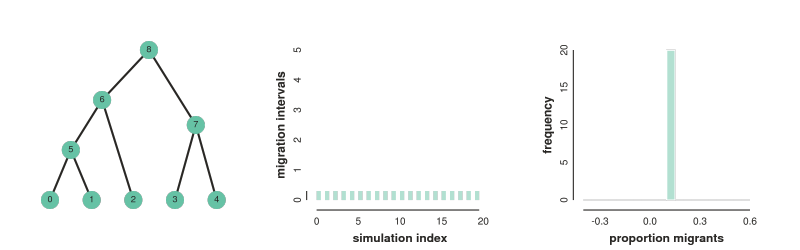

In [12]:
m1 = simcat.Model(tree, theta=0.1, admixture_edges=(1, 2, 0, 0.3, 0.1), ntests=20, nreps=2)
m1.plot_test_values()

In [13]:
m1.run()
m1.counts.shape

(40, 5, 16, 16)

In [14]:
m1._simulate(0).next().genotype_matrix()

array([[0, 1, 0, 0, 0]], dtype=uint8)

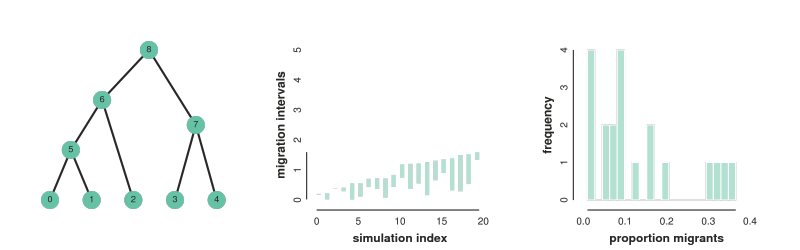

In [15]:
m2 = simcat.Model(tree, theta=0.2, admixture_edges=(1, 2, None, None, None), ntests=20)
m2.plot_test_values()

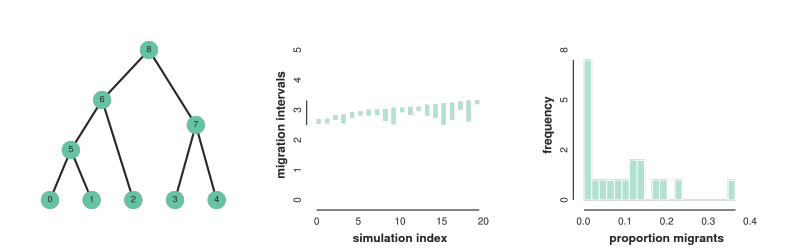

In [18]:
m3 = simcat.Model(tree, theta=(0.1, 1.0), admixture_edges=[(5, 7, None, None, None)], ntests=20)
m3.plot_test_values()


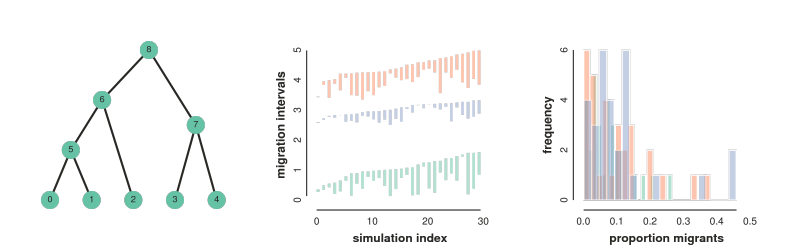

In [19]:
edges = [
    (2, 1, None, None, None), 
    (6, 7, None, None, None), 
    (7, 2, None, None, None),
    ]
m4 = simcat.Model(tree, theta=(0.01, 1.0), admixture_edges=edges, ntests=30)
m4.plot_test_values()

## The `simcat.DataBase` object

The `DataBase` object, in development, could take the list of generated trees and loop over all trees and edges on those trees, and then call `simcat.Model` to sample a range of admixture events on those edges and generate count matrices. The main job of the `DataBase` object is to parallelize all of those simulations and store the results. The results should be stored in a HDF5 database with metadata about the params of the test. 

In [20]:
## init a database
db1 = simcat.DataBase(
    name="test-1", 
    workdir="./databases", 
    tree=tree, 
    nedges=1,
    ntrees=3,
    ntests=20,
    nreps=5,
    edge_function="node_slider",
    force=True)

Do you really want to overwrite the database? (y/n) y
stored 9600 labels to ./databases/test-1.hdf5


In [146]:
db1.nstored_values

9600

In [168]:
def _progress_bar(njobs, nfinished, start, message=""):

    ## measure progress
    if njobs:
        progress = 100 * (nfinished / njobs)
    else:
        progress = 100

    ## build the bar
    hashes = "#" * int(progress / 5.)
    nohash = " " * int(20 - len(hashes))

    ## get time stamp
    elapsed = datetime.timedelta(seconds=int(time.time() - start))

    ## print to stderr
    args = [hashes + nohash, int(progress), elapsed, message]
    print("\r[{}] {:>3}% {} {} ".format(*args), end="", file=sys.stderr)
    sys.stderr.flush()

In [169]:
import sys
import time
import datetime

In [170]:
start = time.time()
time.sleep(1)
_progress_bar(10, 3, start)

[                    ]   0% 0:00:01  

In [145]:
itree = db1._get_tree_generator()
itree.next().draw(node_labels='idx');

0 1 2 3 4 idx: 0
name: 0
dist: 0.188045796094
support: 100
height: 8.881784197e-16 0 idx: 1
name: 1
dist: 0.188045796094
support: 100
height: 8.881784197e-16 1 idx: 2
name: 2
dist: 0.506308351425
support: 100
height: 8.881784197e-16 2 idx: 3
name: 3
dist: 1.23215164747
support: 100
height: 0.0 3 idx: 4
name: 4
dist: 1.23215164747
support: 100
height: 0.0 4 idx: 5
name: r8
dist: 0.318262555331
support: 1
height: 0.188045796094 5 idx: 6
name: r7
dist: 4.49369164858
support: 1
height: 0.506308351425 6 idx: 7
name: r6
dist: 3.76784835253
support: 1
height: 1.23215164747 7 idx: 8
name: r5
dist: 0.0
support: 100
height: 5.0 8

In [144]:
## init a database
db1 = simcat.DataBase(
    name="test-1", 
    workdir="./databases", 
    tree=tree, 
    nedges=1,
    ntests=5,
    edge_function="node_slider",
    force=True)

itree = db1._get_tree_generator()

Do you really want to overwrite the database? (y/n) yes
stored 23000 labels to ./databases/test-1.hdf5


In [270]:
it = itree.next()

c, a = it.draw(
    width=350,
    orient='down', 
    node_labels='idx',
    node_size=15,
    tip_labels=False
    );
a.show = True
a.x.show = False
a.y.ticks.show = True

len(simcat.get_all_admix_edges(it))

50

idx: 0
name: t-5
dist: 0.195799292239
support: 100
height: 0.0 0 idx: 1
name: t-4
dist: 0.195799292239
support: 100
height: 0.0 1 idx: 2
name: t-3
dist: 0.667225488808
support: 100
height: 0.0 2 idx: 3
name: t-2
dist: 0.827973148091
support: 100
height: 0.0 3 idx: 4
name: t-1
dist: 0.273055930831
support: 100
height: 0.0 4 idx: 5
name: t-0
dist: 0.273055930831
support: 100
height: 0.0 5 idx: 6
name: i6
dist: 0.471426196568
support: 1
height: 0.195799292239 6 idx: 7
name: i7
dist: 0.160747659284
support: 1
height: 0.667225488808 7 idx: 8
name: i8
dist: 0.172026851909
support: 1
height: 0.827973148091 8 idx: 9
name: i9
dist: 0.726944069169
support: 1
height: 0.273055930831 9 idx: 10
name: i10
dist: 0.0
support: 100
height: 1.0 10 -1.0 -0.5 0.0

In [271]:
simcat.get_all_admix_edges(it)

{(0, 1): (0.0, 0.1957992922394437),
 (0, 2): (0.0, 0.1957992922394437),
 (0, 3): (0.0, 0.1957992922394437),
 (0, 4): (0.0, 0.1957992922394437),
 (0, 5): (0.0, 0.1957992922394437),
 (1, 0): (0.0, 0.1957992922394437),
 (1, 2): (0.0, 0.1957992922394437),
 (1, 3): (0.0, 0.1957992922394437),
 (1, 4): (0.0, 0.1957992922394437),
 (1, 5): (0.0, 0.1957992922394437),
 (2, 0): (0.0, 0.1957992922394437),
 (2, 1): (0.0, 0.1957992922394437),
 (2, 3): (0.0, 0.6672254888078881),
 (2, 4): (0.0, 0.27305593083134827),
 (2, 5): (0.0, 0.27305593083134827),
 (2, 6): (0.1957992922394437, 0.6672254888078881),
 (2, 9): (0.27305593083134827, 0.6672254888078881),
 (3, 0): (0.0, 0.1957992922394437),
 (3, 1): (0.0, 0.1957992922394437),
 (3, 2): (0.0, 0.6672254888078881),
 (3, 4): (0.0, 0.27305593083134827),
 (3, 5): (0.0, 0.27305593083134827),
 (3, 6): (0.1957992922394437, 0.6672254888078881),
 (3, 7): (0.6672254888078881, 0.8279731480914452),
 (3, 9): (0.27305593083134827, 0.8279731480914452),
 (4, 0): (0.0, 0.19

In [13]:
## just connects so far, does not run anything
db1.run2()

host compute node: [4 cores] on oud
ready to run


# TODOs

### (1) Writing the `Database.run` function 
The way we have it now Database.run will need to call Model.run(), which means that we would need to store all of the Model objects. That's not ideal. It would be better if the Database, once generated, can stand alone be run, stopped, restarted, etc. just from the info in it. I think we can do that but it will take a little work. 

### (2) Storing data more efficiently
If a lot of the data stays the same over the `nreps` dimension then we should presumably be able to store those values just once instead of `nreps` times. The only worry is that users may add a bunch of values to the database with nreps=100 and then add more with nreps=1000. We could enforce nreps to not be changeable after init, or we could store nreps as an extra column so that we can just re-replicate the values later when handing them into the ML program. This approach has the downside of making it a bit trickier to randomly sample rows from the final super large array though..., which we'll probably do using something like dask. 

### (3) Can we rebuild Model objects from the database info?
Seem doable... nb: should store newick topo in hdf5 once as an attr. 

In [26]:
## remake the tree with fixed topo from edge_lengths
#...


## rebuild the admixture_edges from admix labels
#...


## resample params like Ne...
#...



In [787]:
## generate a random tree
random.seed(123)
tree = toytree.rtree(10)
tree.tree.convert_to_ultrametric()
tree.draw(tree_style='c', node_labels='idx', tip_labels=False, padding=50);

idx: 0
name: t-9
dist: 1
support: 100
height: 0 0 idx: 1
name: t-8
dist: 1
support: 100
height: 0 1 idx: 2
name: t-7
dist: 2
support: 100
height: 0 2 idx: 3
name: t-6
dist: 1
support: 100
height: 0 3 idx: 4
name: t-5
dist: 1
support: 100
height: 0 4 idx: 5
name: t-4
dist: 2
support: 100
height: 0 5 idx: 6
name: t-3
dist: 1
support: 100
height: 0 6 idx: 7
name: t-2
dist: 1
support: 100
height: 0 7 idx: 8
name: t-1
dist: 2
support: 100
height: 0 8 idx: 9
name: t-0
dist: 3
support: 100
height: 0 9 idx: 10
name: i10
dist: 1
support: 1
height: 1 10 idx: 13
name: i13
dist: 1
support: 1
height: 2 14 idx: 11
name: i11
dist: 1
support: 1
height: 1 13 idx: 14
name: i14
dist: 1
support: 1
height: 2 16 idx: 16
name: i16
dist: 1
support: 1
height: 3 15 idx: 12
name: i12
dist: 1
support: 1
height: 1 11 idx: 15
name: i15
dist: 1
support: 1
height: 2 12 idx: 17
name: i17
dist: 1
support: 1
height: 3 17 idx: 18
name: i18
dist: 0
support: 100
height: 4 18

In [999]:
def node_slide(ttree):
    ctree = copy.deepcopy(ttree)
    for node in ctree.tree.traverse():
        ## slide internal nodes 
        if node.up and node.children:
            ## get min and max slides
            minjit = max([i.dist for i in node.children]) * 0.99
            maxjit = (node.up.height * 0.99) - node.height
            newheight = np.random.uniform(low=-minjit, high=maxjit)
            ## slide children
            for child in node.children:
                child.dist += newheight
            ## slide self to match
            node.dist -= newheight
    ## make max height = 1
    mod = ctree.tree.height
    for node in ctree.tree.traverse():
        node.dist = node.dist / float(mod)
    return ctree

In [1000]:
ctree = tree.copy()

In [1225]:
c, a = node_slide(ctree).draw(
    width=400,
    orient='down', 
    node_labels='idx',
    node_size=15,
    tip_labels=False
    );
a.show = True
a.x.show = False
a.y.ticks.show = True

idx: 0
name: t-9
dist: 0.0932407085971
support: 100
height: 0.0 0 idx: 1
name: t-8
dist: 0.0932407085971
support: 100
height: 0.0 1 idx: 2
name: t-7
dist: 0.24590427613
support: 100
height: 0.0 2 idx: 3
name: t-6
dist: 0.121778548246
support: 100
height: 0.0 3 idx: 4
name: t-5
dist: 0.121778548246
support: 100
height: 0.0 4 idx: 5
name: t-4
dist: 0.702076330282
support: 100
height: 0.0 5 idx: 6
name: t-3
dist: 0.10867767172
support: 100
height: 0.0 6 idx: 7
name: t-2
dist: 0.10867767172
support: 100
height: 0.0 7 idx: 8
name: t-1
dist: 0.122911292858
support: 100
height: 0.0 8 idx: 9
name: t-0
dist: 0.439682200473
support: 100
height: 0.0 9 idx: 10
name: i10
dist: 0.152663567533
support: 1
height: 0.0932407085971 10 idx: 13
name: i13
dist: 0.499504725302
support: 1
height: 0.24590427613 14 idx: 11
name: i11
dist: 0.580297782037
support: 1
height: 0.121778548246 13 idx: 14
name: i14
dist: 0.0433326711493
support: 1
height: 0.702076330282 16 idx: 16
name: i16
dist: 0.254590998568
support: 1
height: 0.745409001432 15 idx: 12
name: i12
dist: 0.0142336211375
support: 1
height: 0.10867767172 11 idx: 15
name: i15
dist: 0.316770907615
support: 1
height: 0.122911292858 12 idx: 17
name: i17
dist: 0.560317799527
support: 1
height: 0.439682200473 17 idx: 18
name: i18
dist: 0.0
support: 100
height: 1.0 18 -1.0 -0.5 0.0